In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
epoch_key = "bon", 3, 2

In [3]:
from src.standard_decoder import load_data

(
    linear_position,
    multiunit_dfs,
    position_info,
    ripple_times,
    track_graph,
    center_well_id,
) = load_data(epoch_key)

/Users/edeno/miniconda3/envs/replay_trajectory_paper/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/Users/edeno/miniconda3/envs/replay_trajectory_paper/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
/Users/edeno/miniconda3/envs/replay_trajectory_paper/lib/python3.6/site-packages/loren_frank_data_processing/track_segment_classification.py:59: RuntimeWarning: invalid value encountered in less
  nx[np.where(nx < 0)] = 0.0
/Users/

In [4]:
from src.standard_decoder import fit_mark_likelihood

(
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    place_bin_centers,
    place_bin_edges,
    edges,
) = fit_mark_likelihood(linear_position, multiunit_dfs, track_graph, center_well_id)

In [5]:
import xarray as xr

data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    "../Processed-Data/bon_03_02.nc", group=f"/{data_type}/{dim}/classifier/ripples/"
)

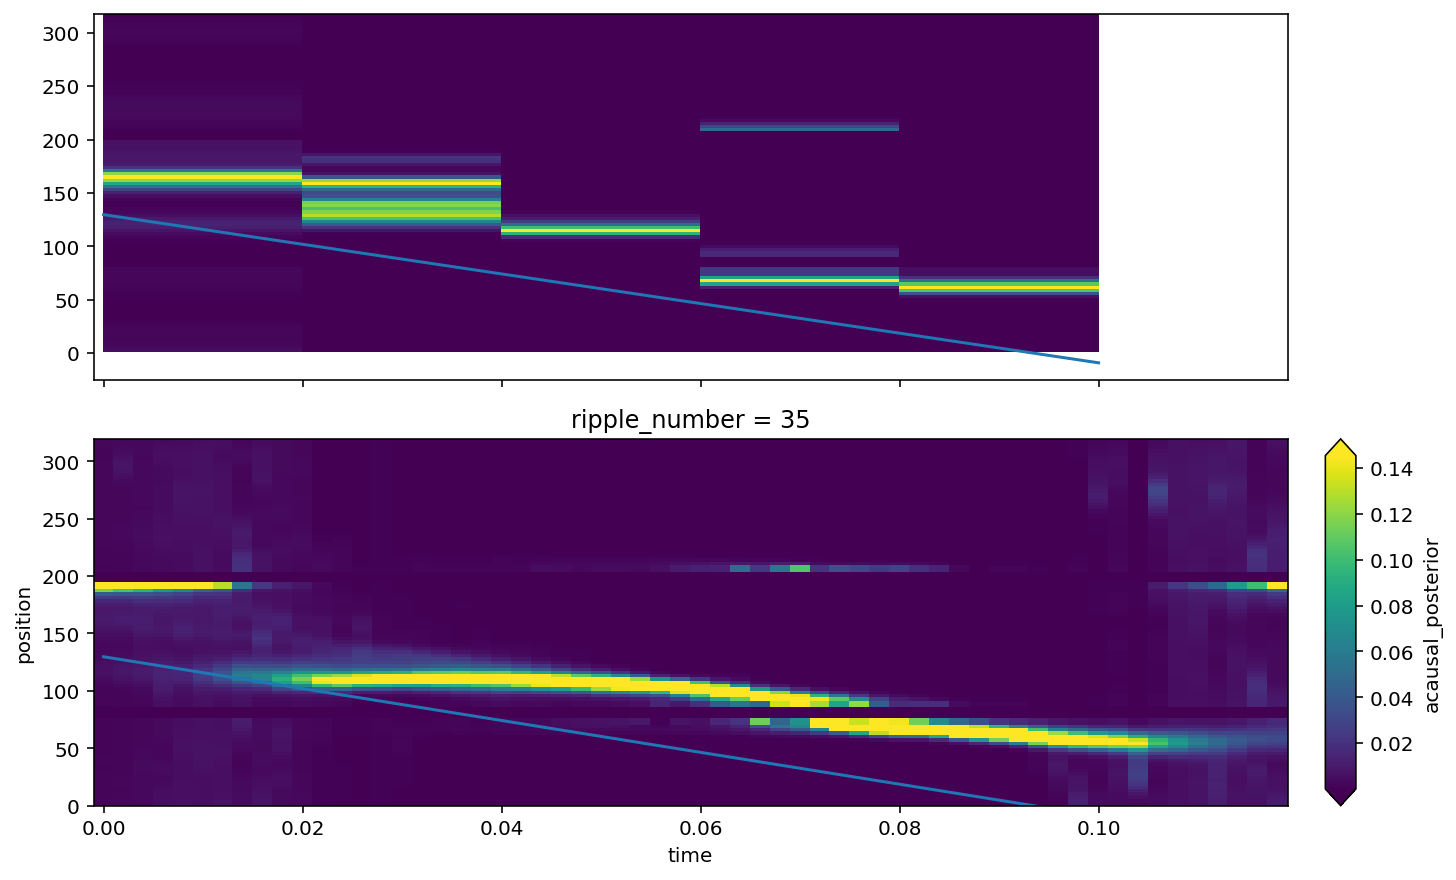

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from src.standard_decoder import detect_line_with_radon, predict_mark_likelihood

ripple_number = 35

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

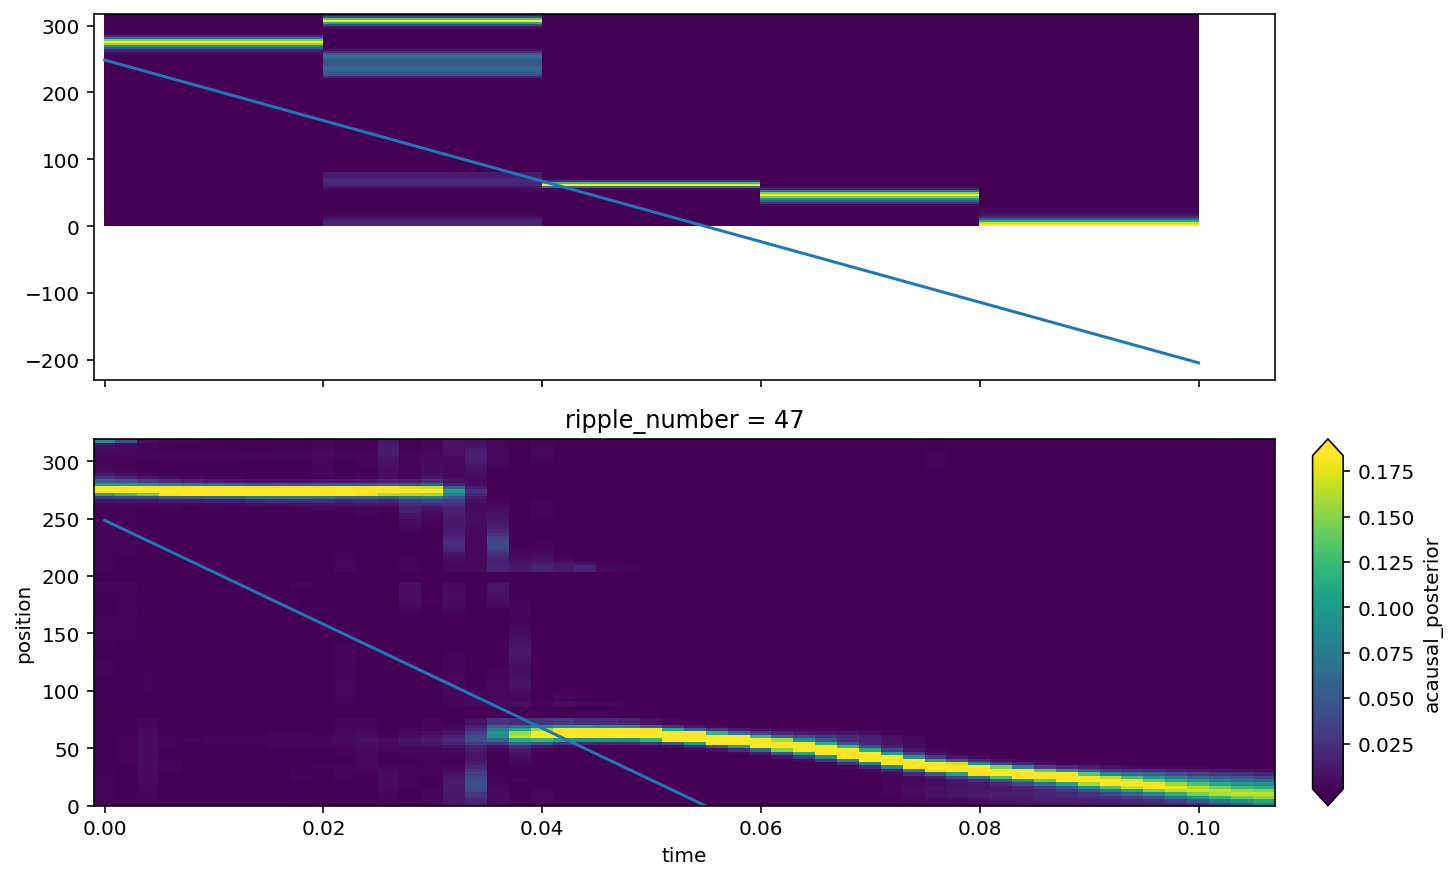

In [25]:
ripple_number = 47

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)
/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: invalid value encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


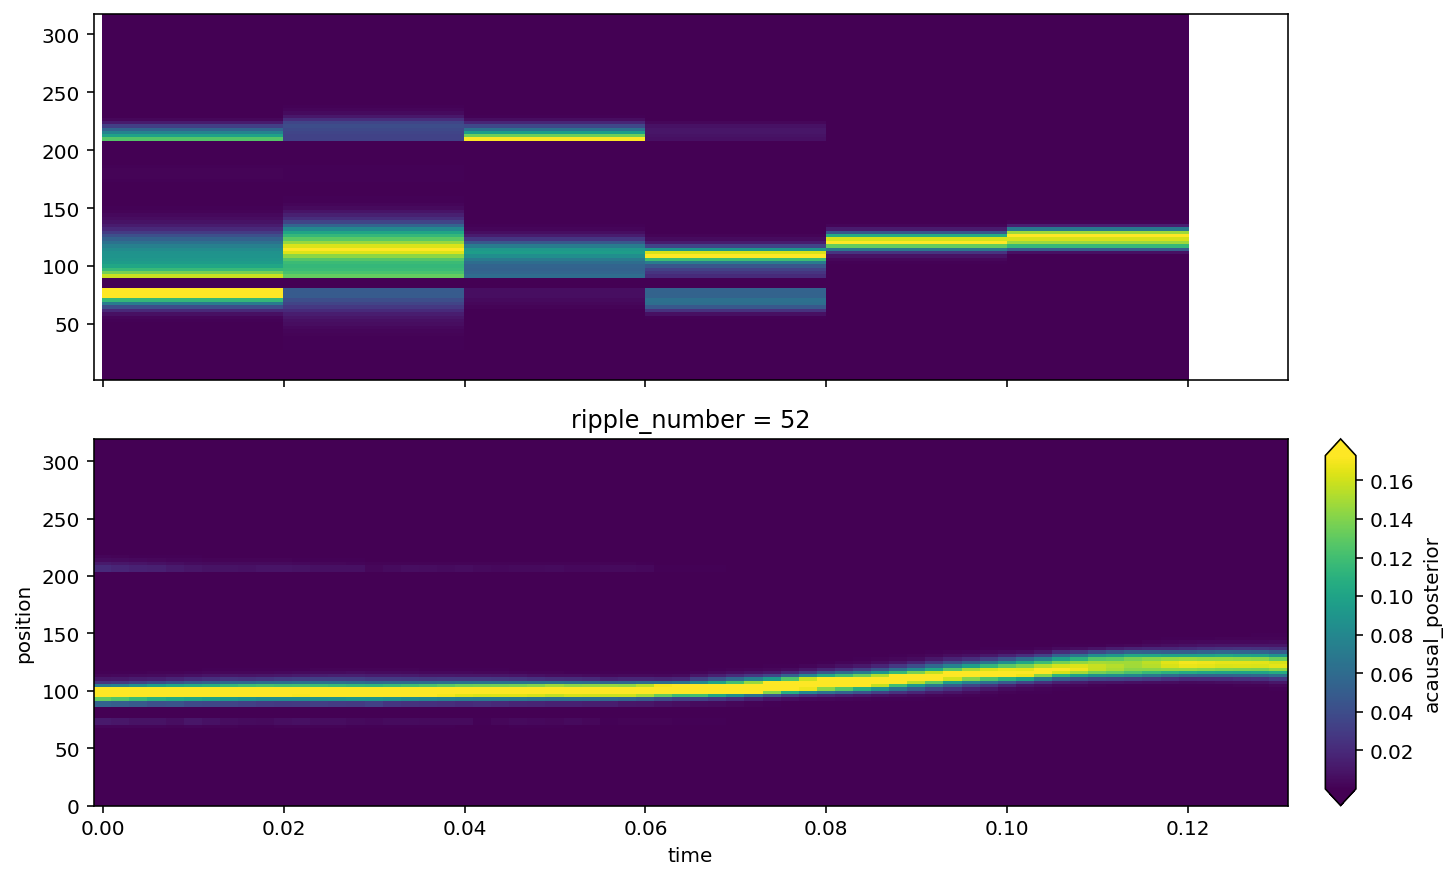

In [26]:
ripple_number = 52

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

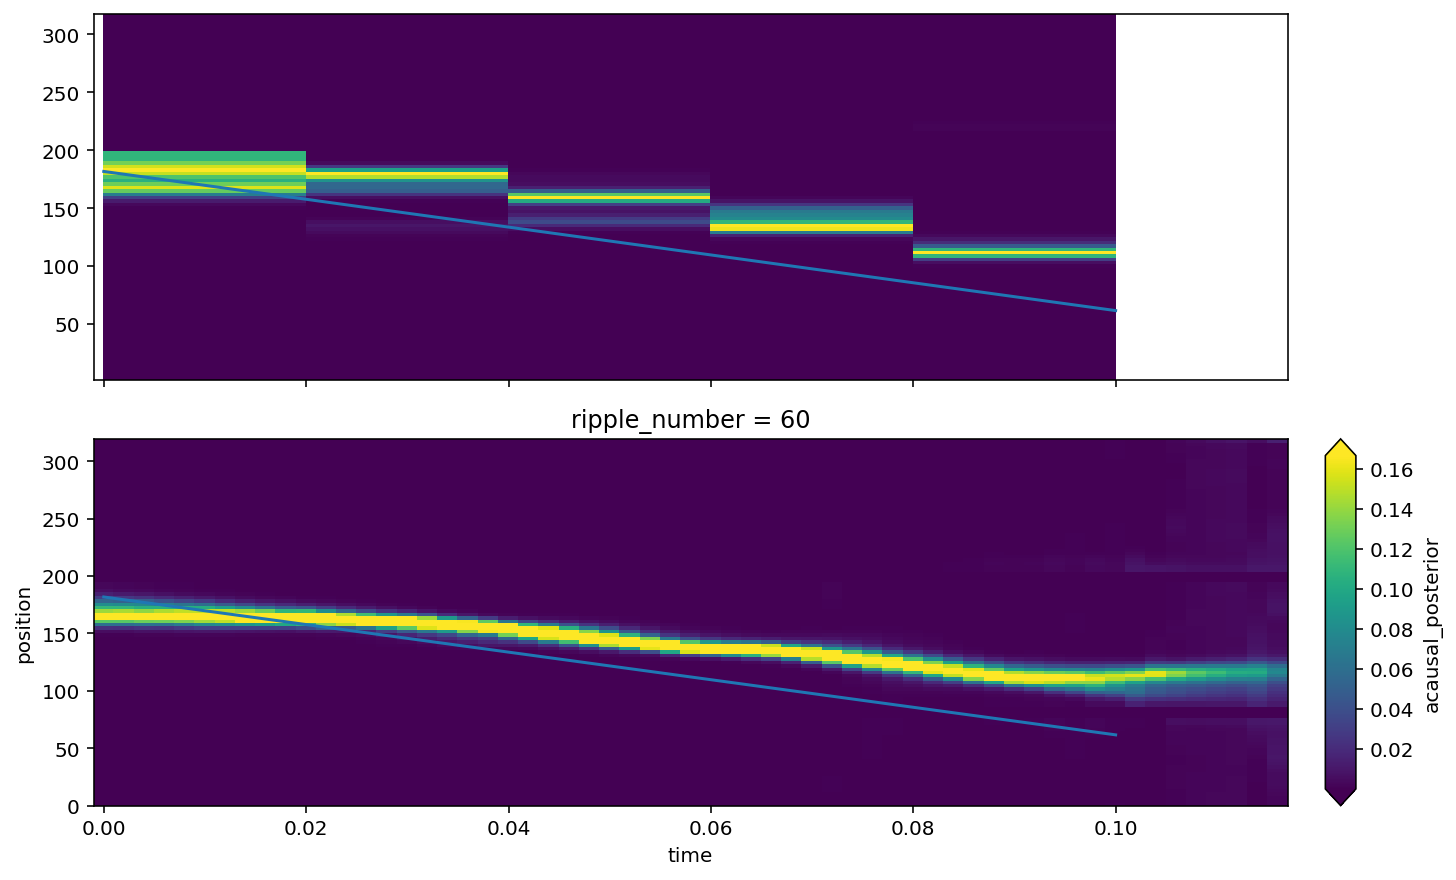

In [27]:
ripple_number = 60

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


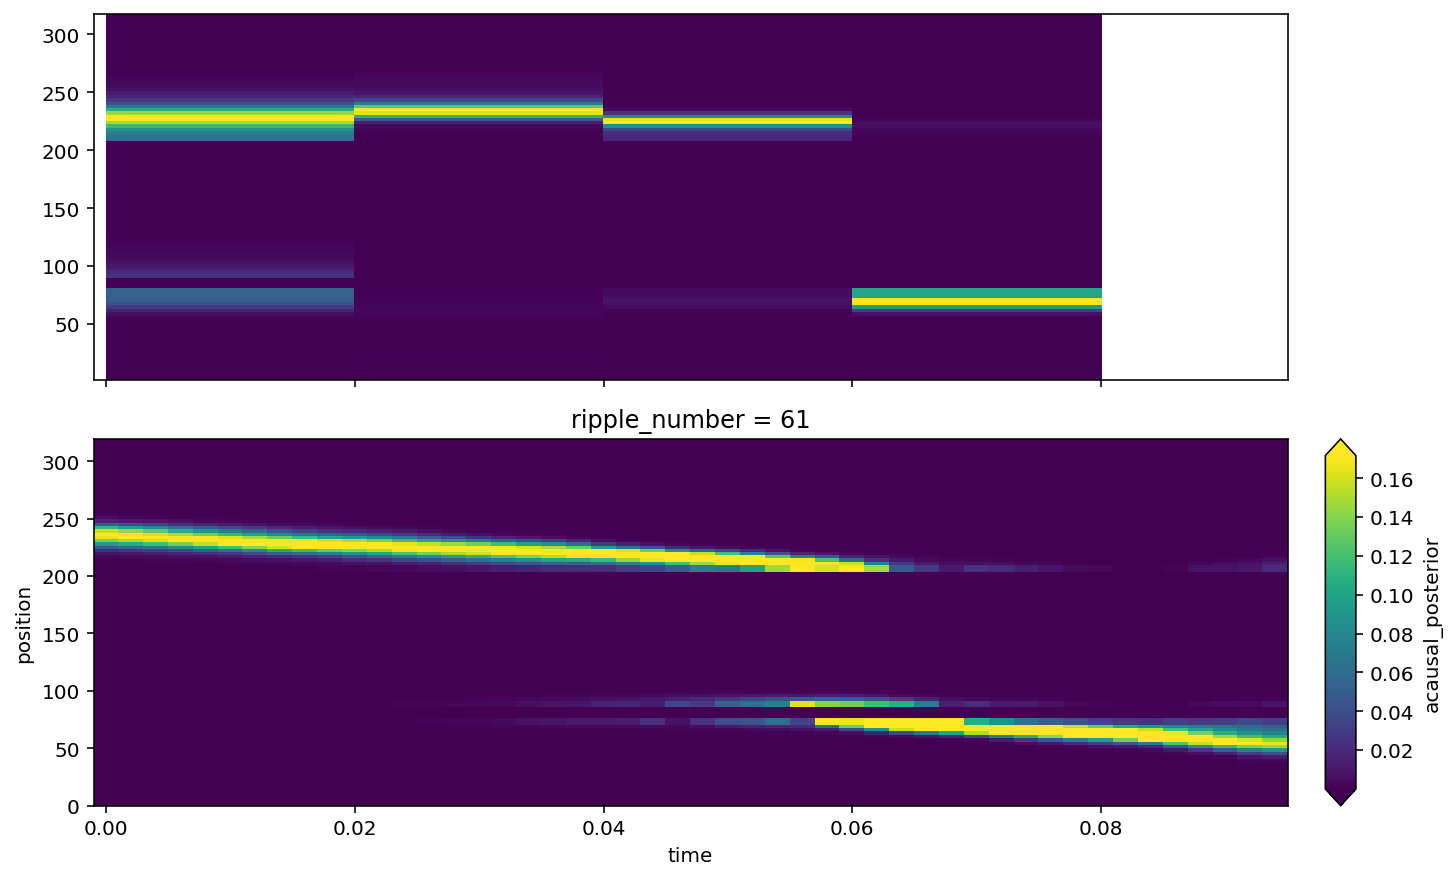

In [28]:
ripple_number = 61

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)
/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: invalid value encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


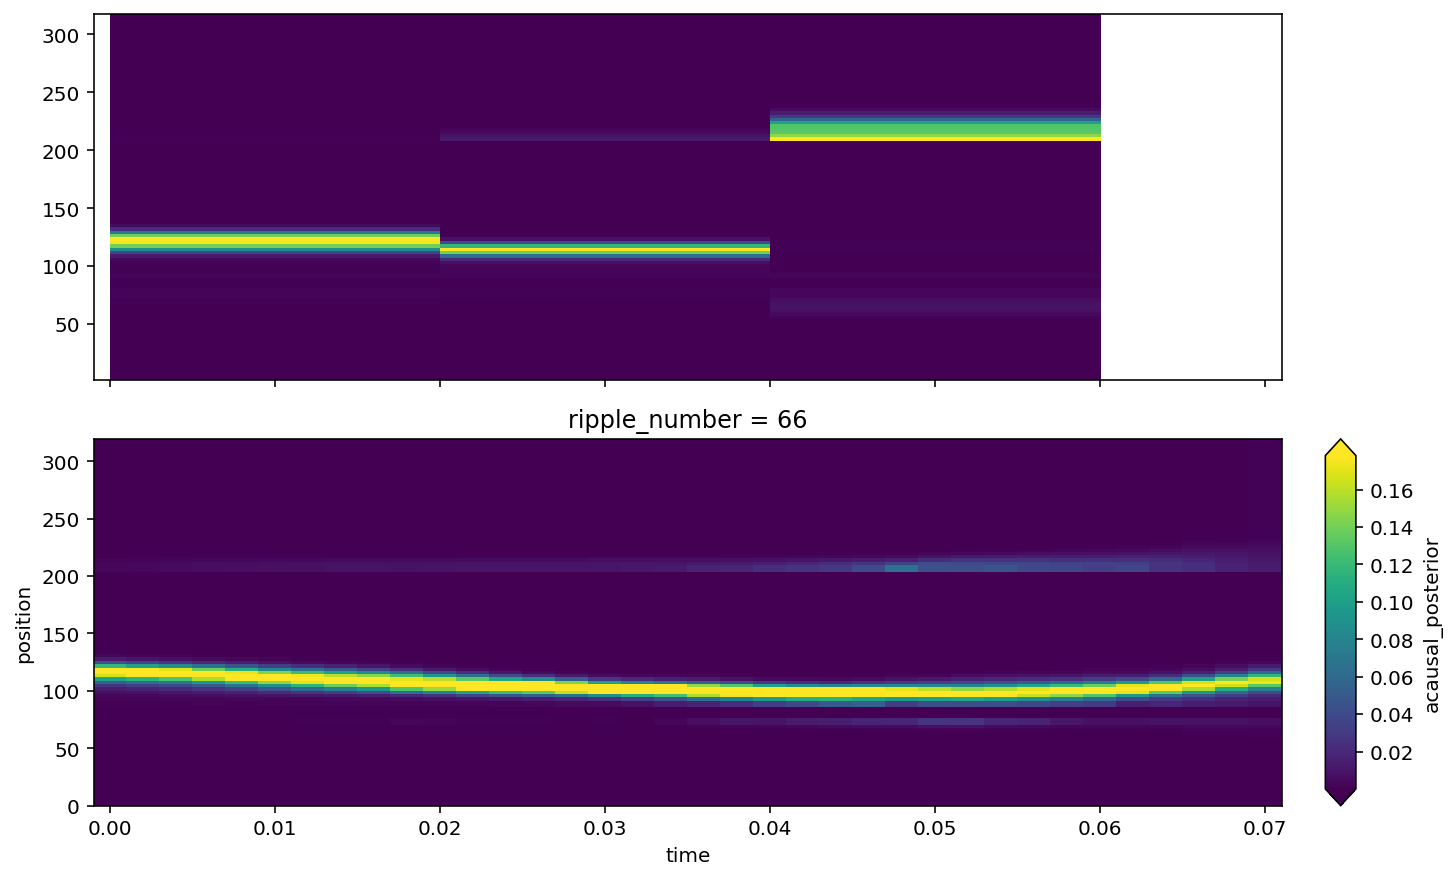

In [29]:
ripple_number = 66

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

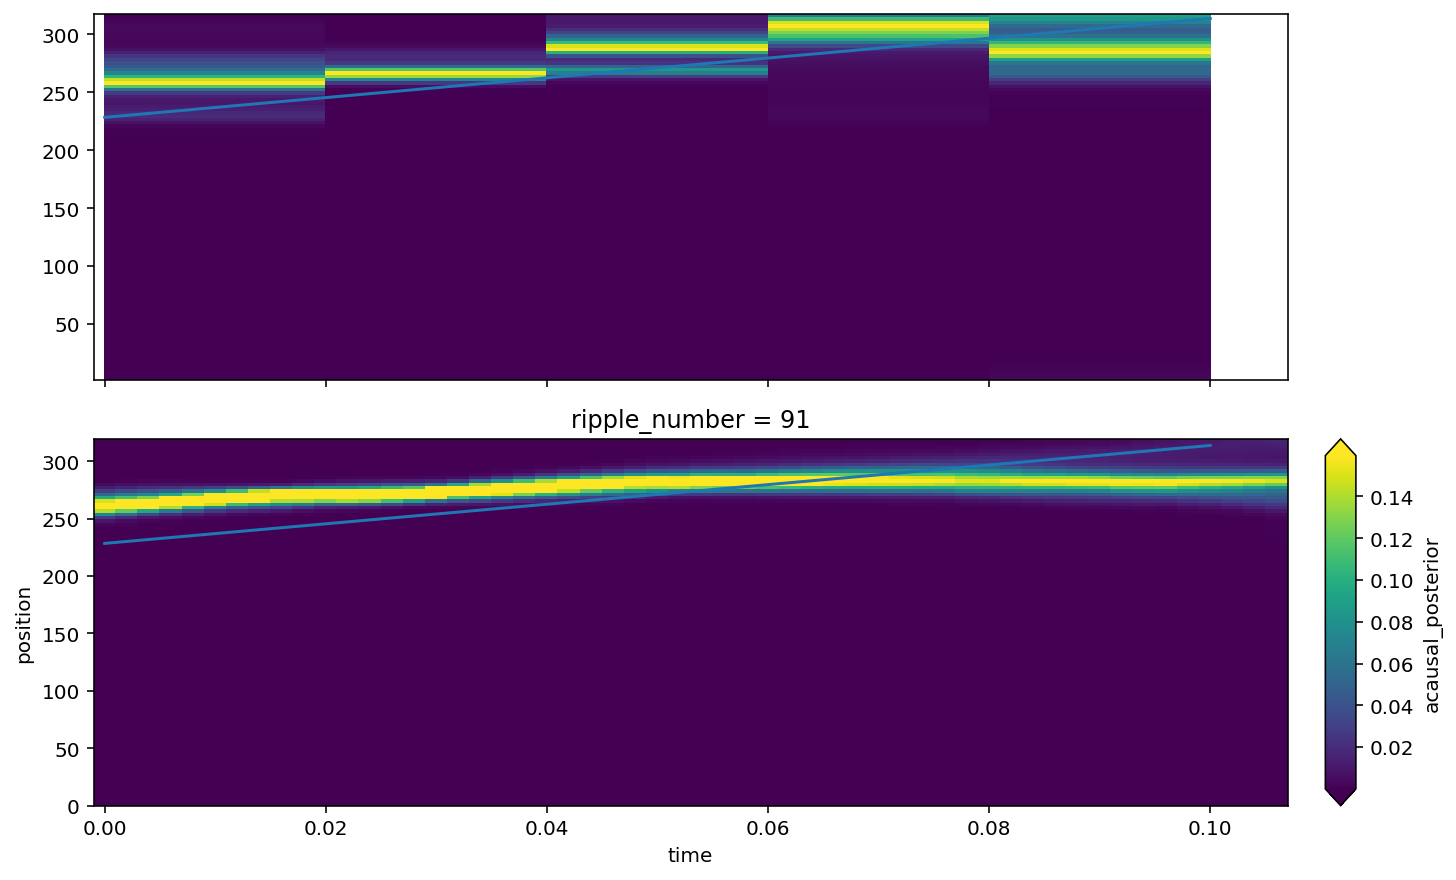

In [30]:
ripple_number = 91

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


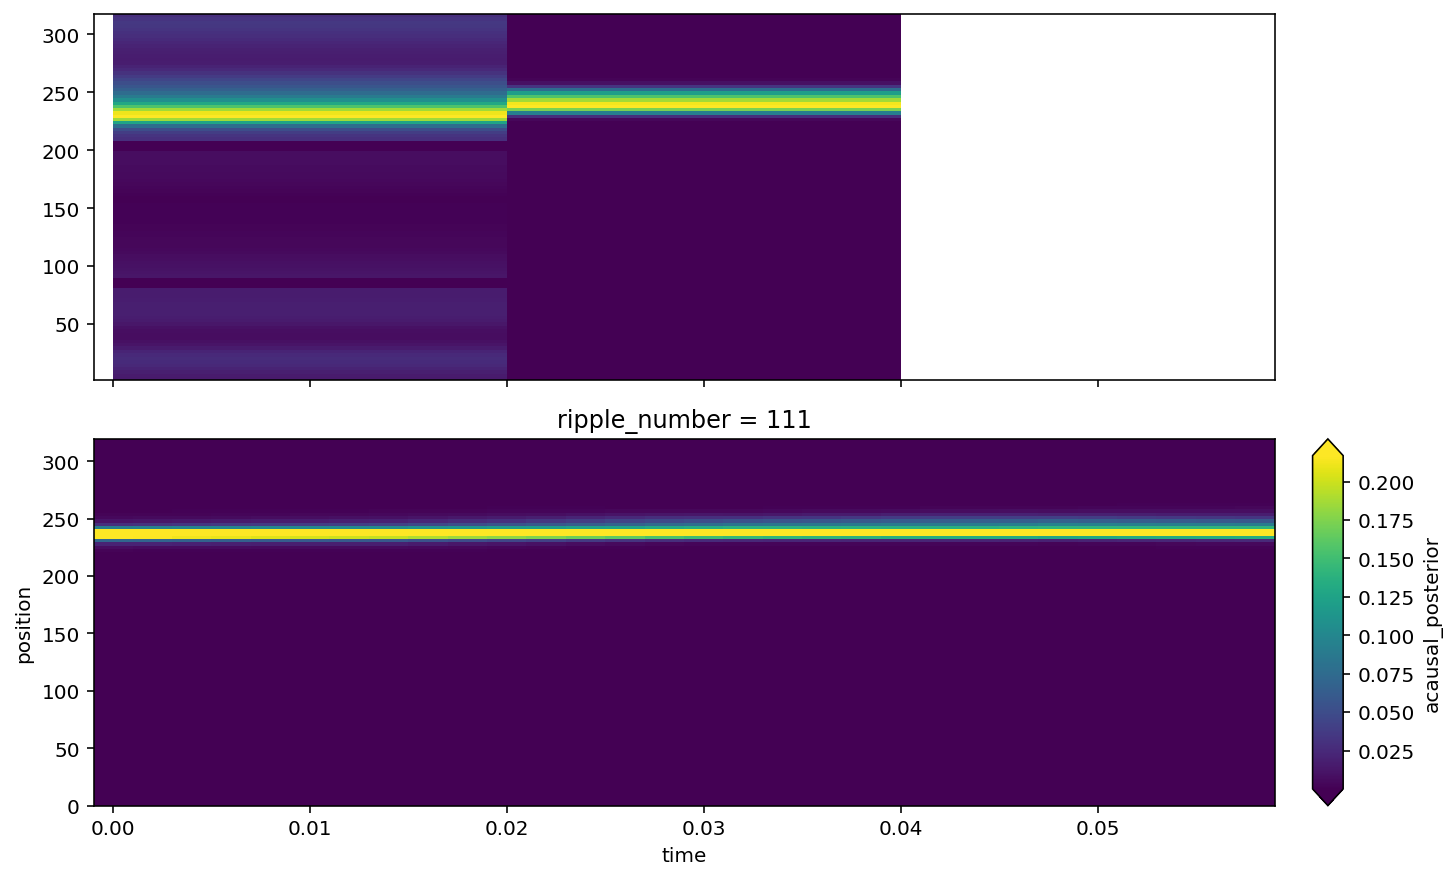

In [31]:
ripple_number = 111

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

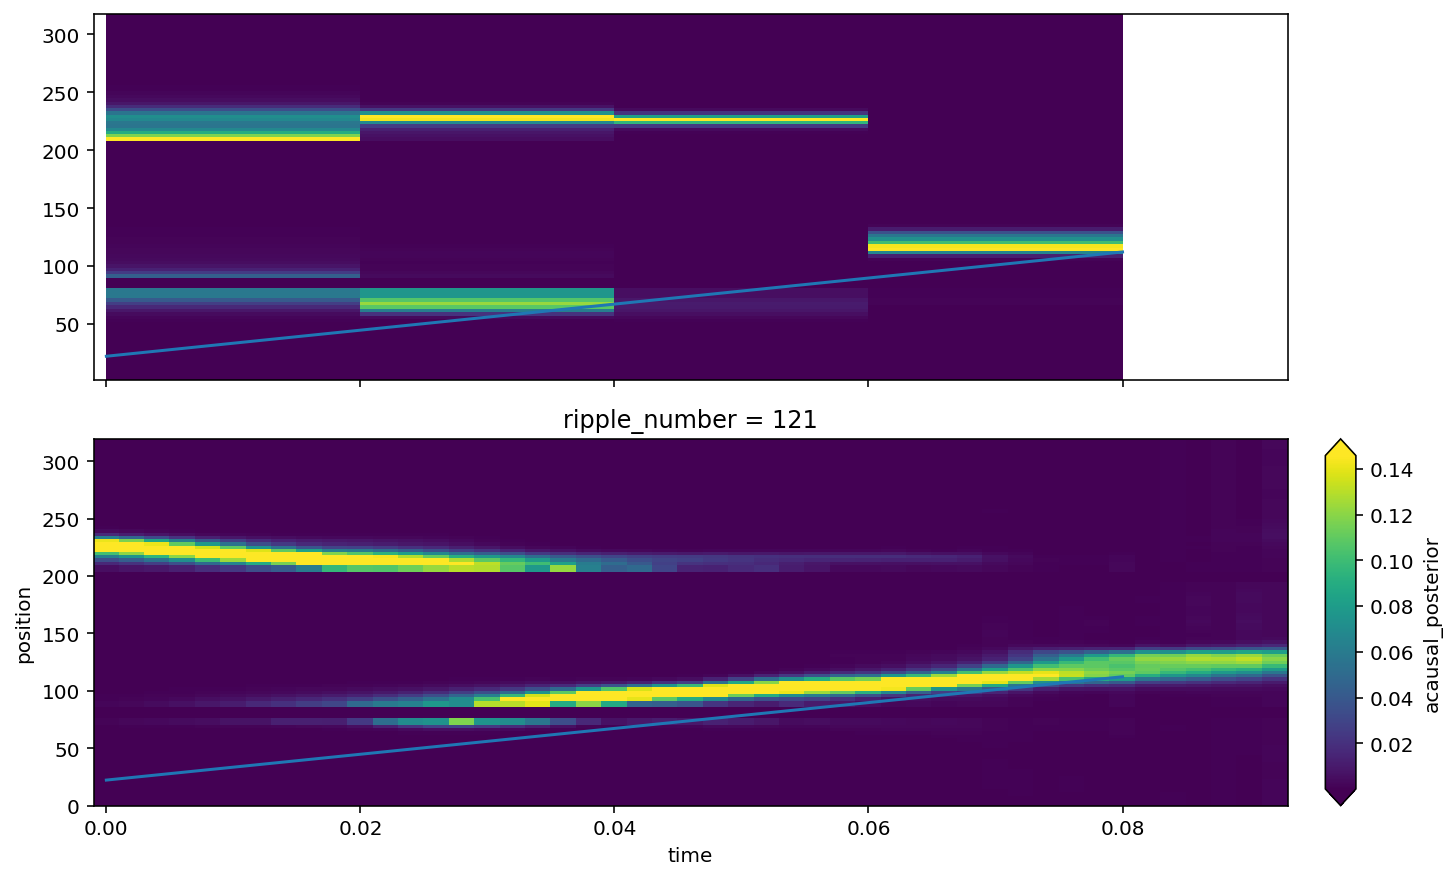

In [32]:
ripple_number = 121

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

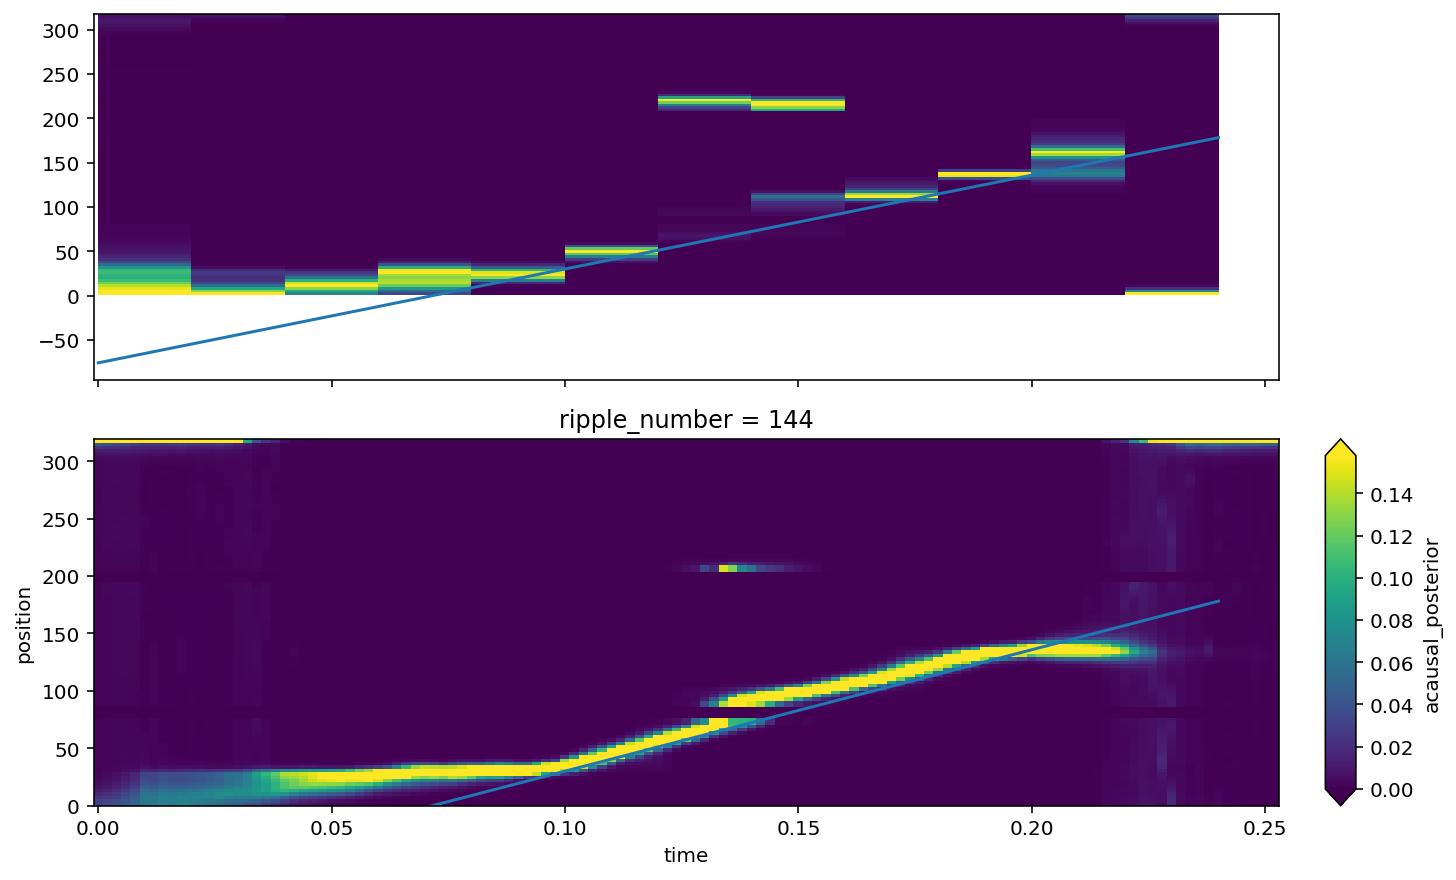

In [33]:
ripple_number = 144

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)
/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: invalid value encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


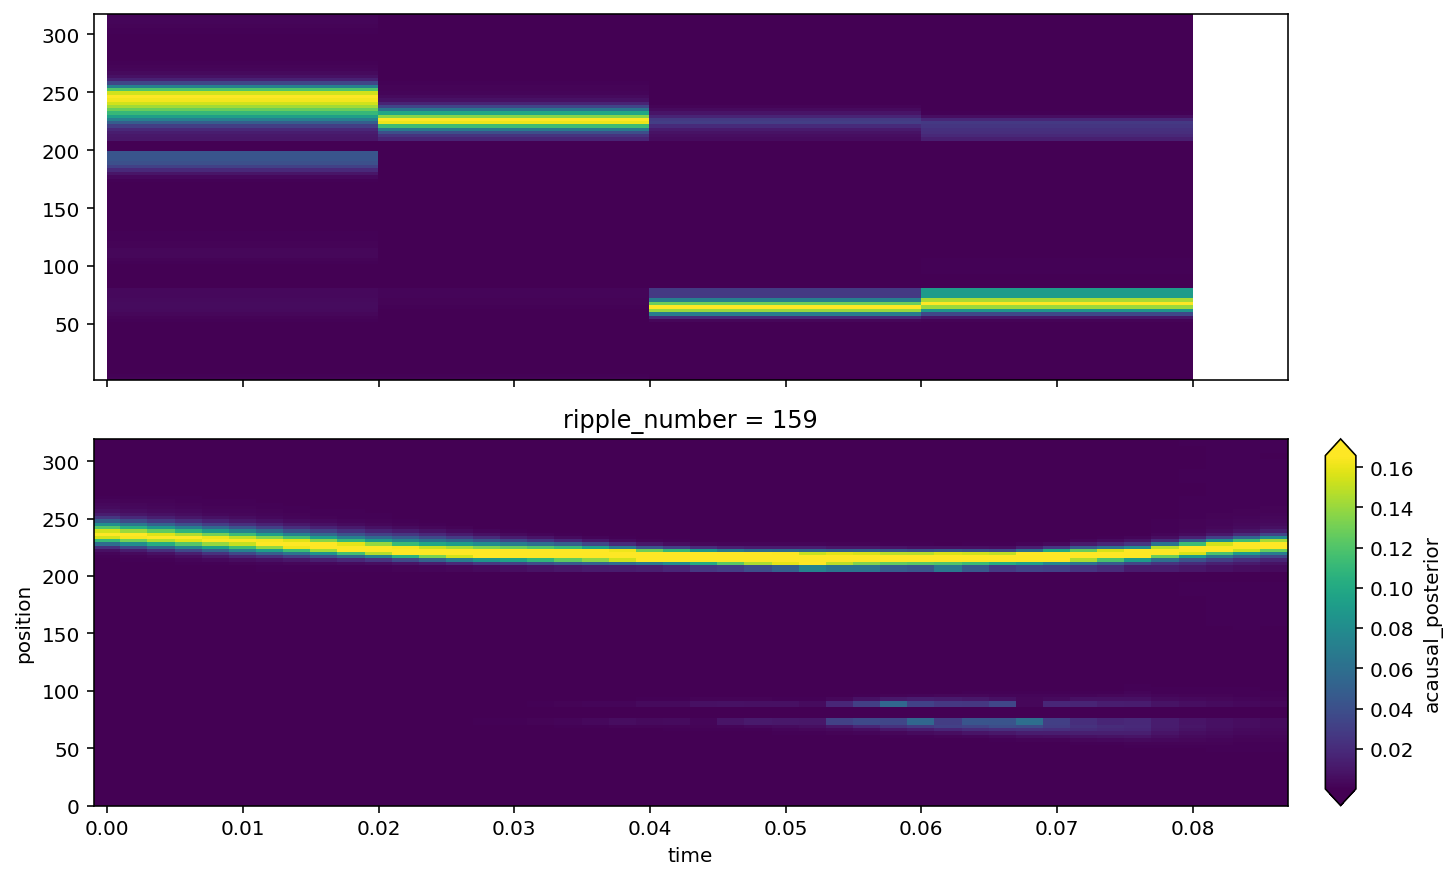

In [34]:
ripple_number = 159

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

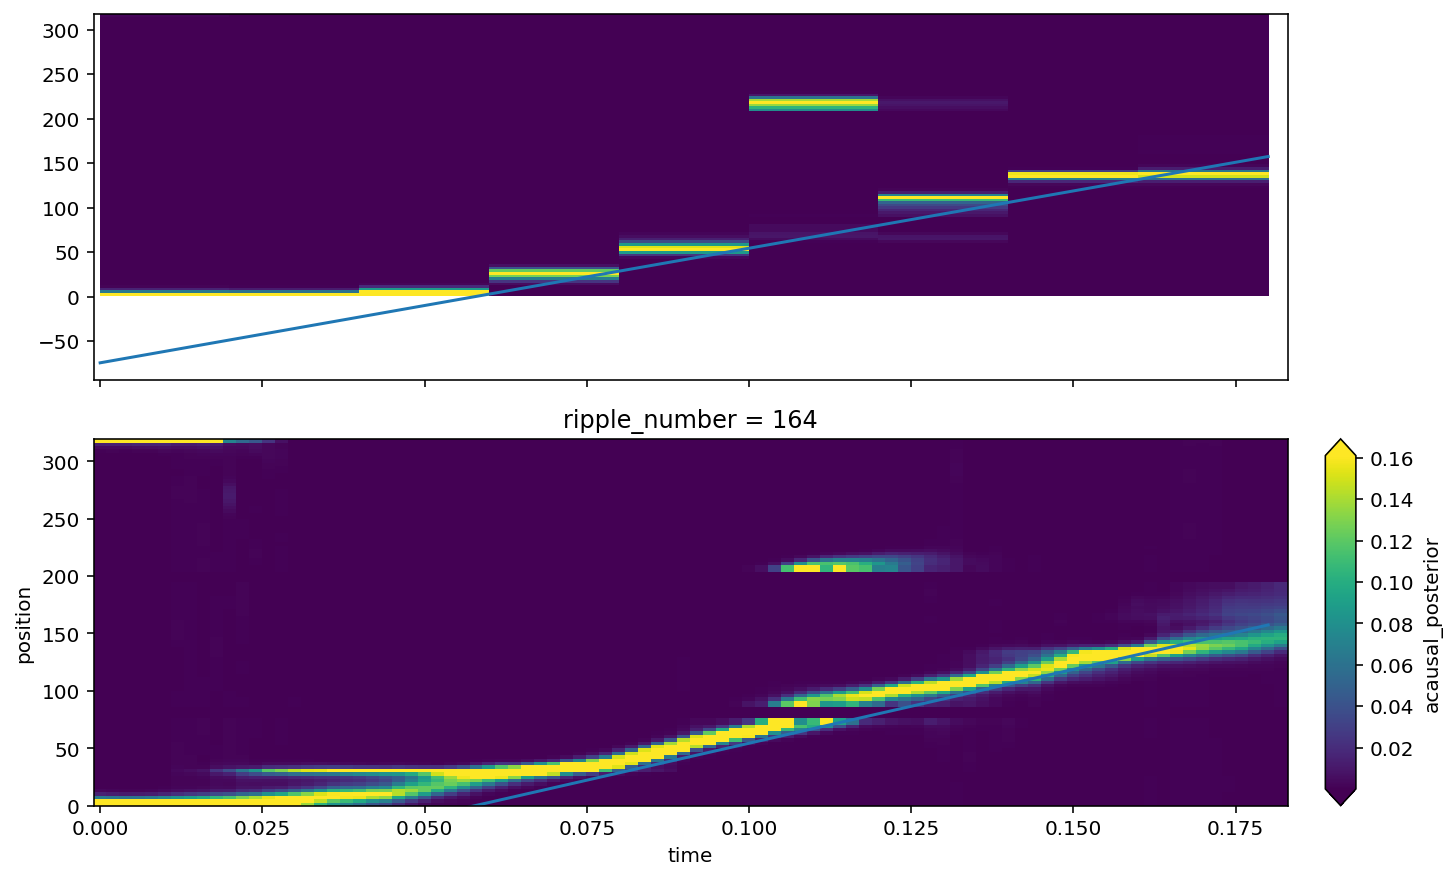

In [35]:
ripple_number = 164

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

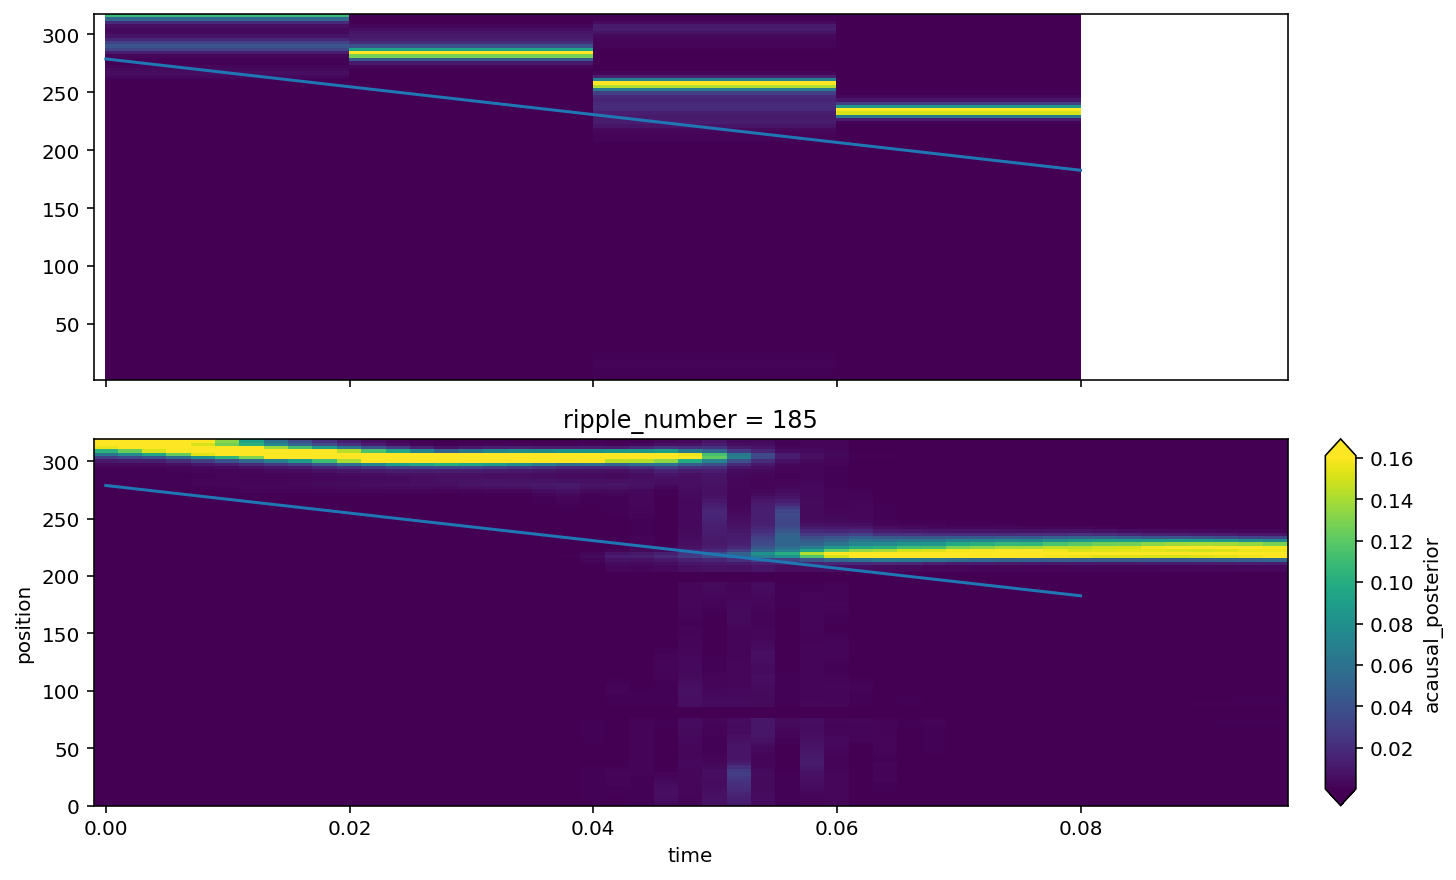

In [36]:
ripple_number = 185

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

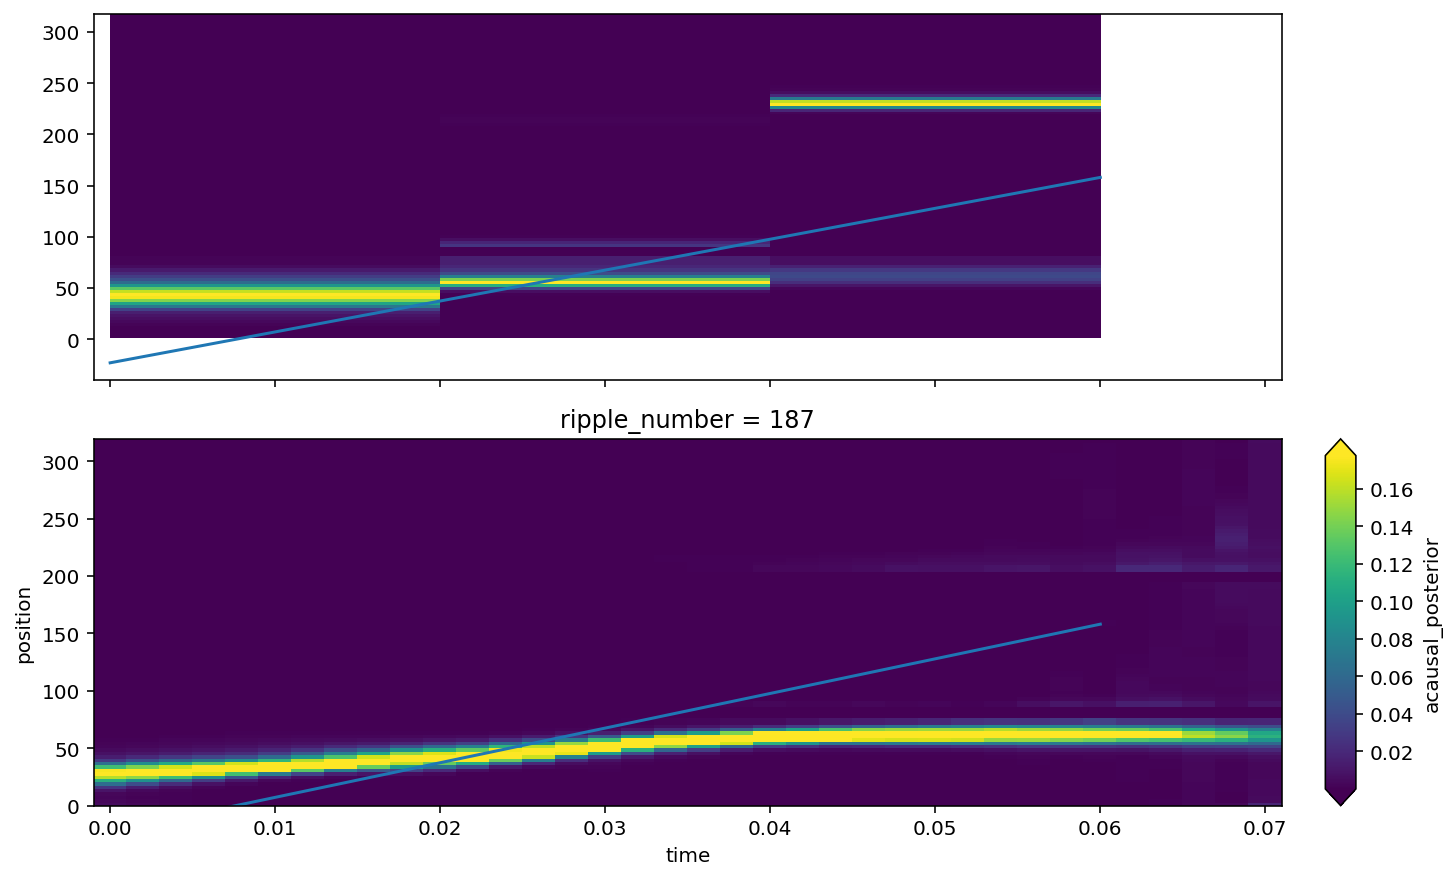

In [37]:
ripple_number = 187

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)
/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: invalid value encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


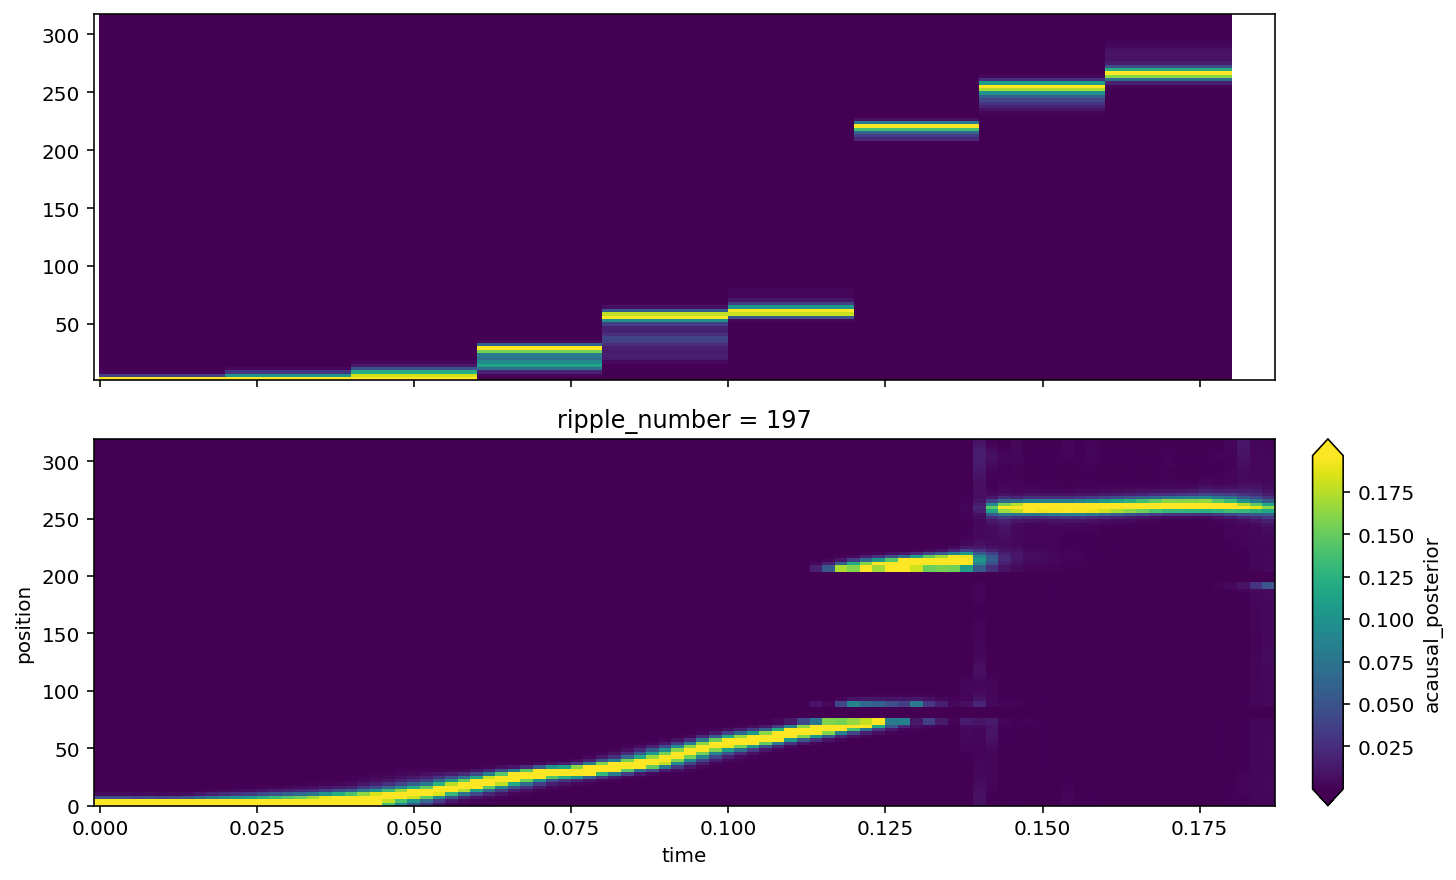

In [38]:
ripple_number = 197

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


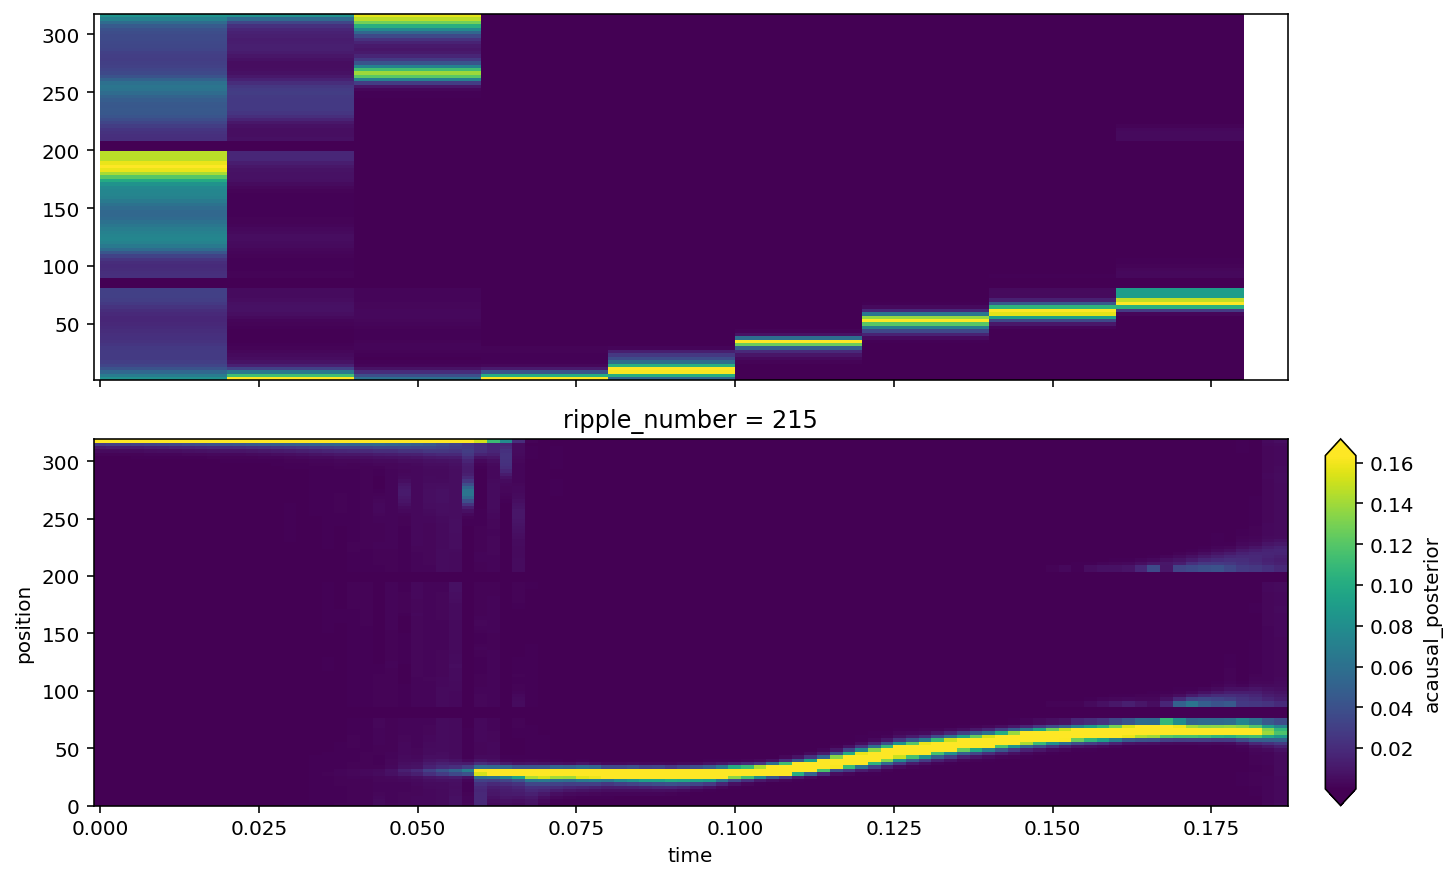

In [39]:
ripple_number = 215

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)
/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: invalid value encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


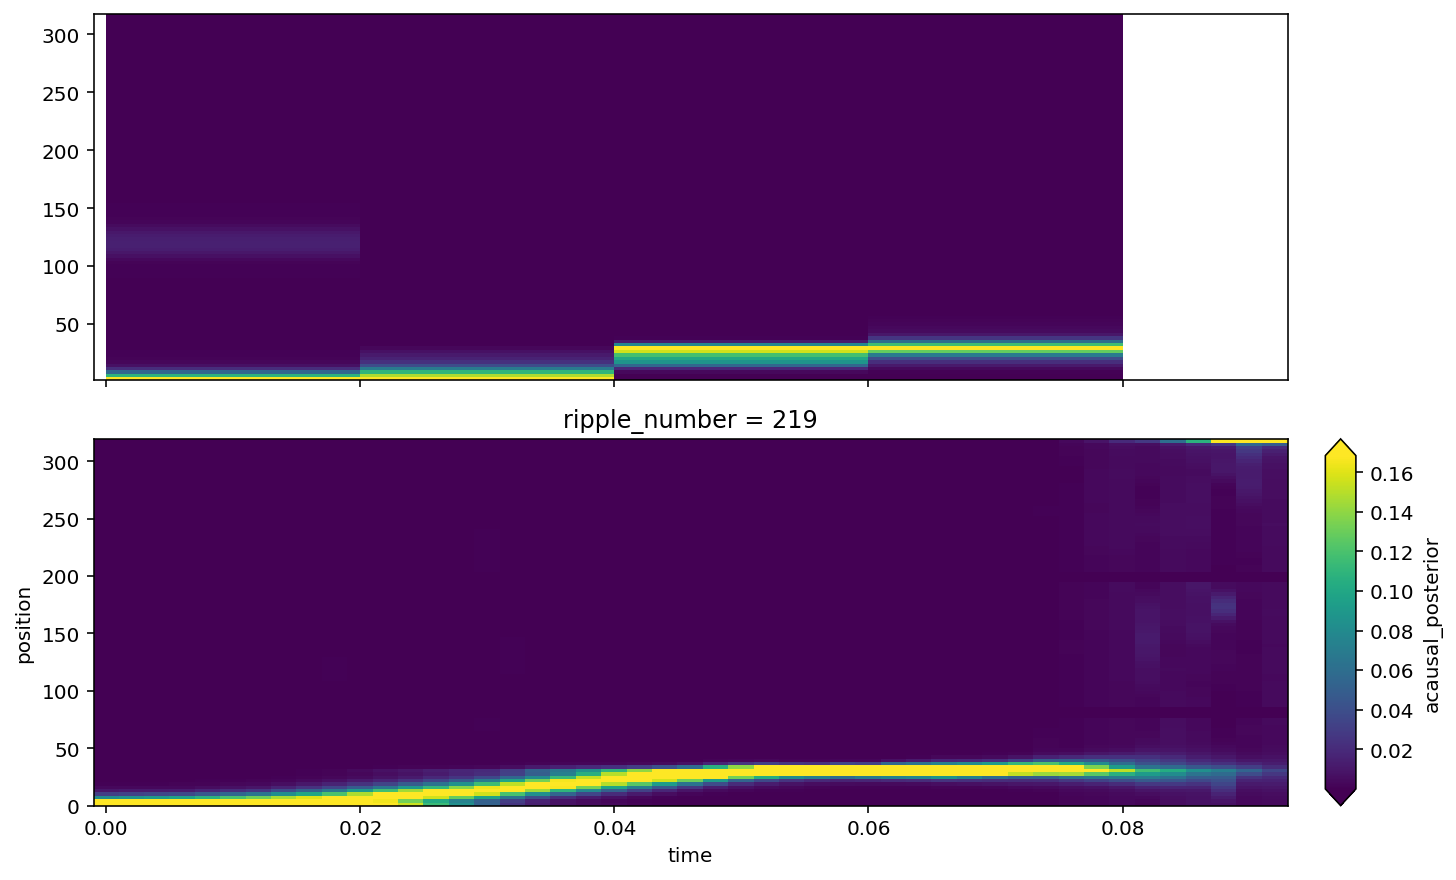

In [40]:
ripple_number = 219

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)
/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: invalid value encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


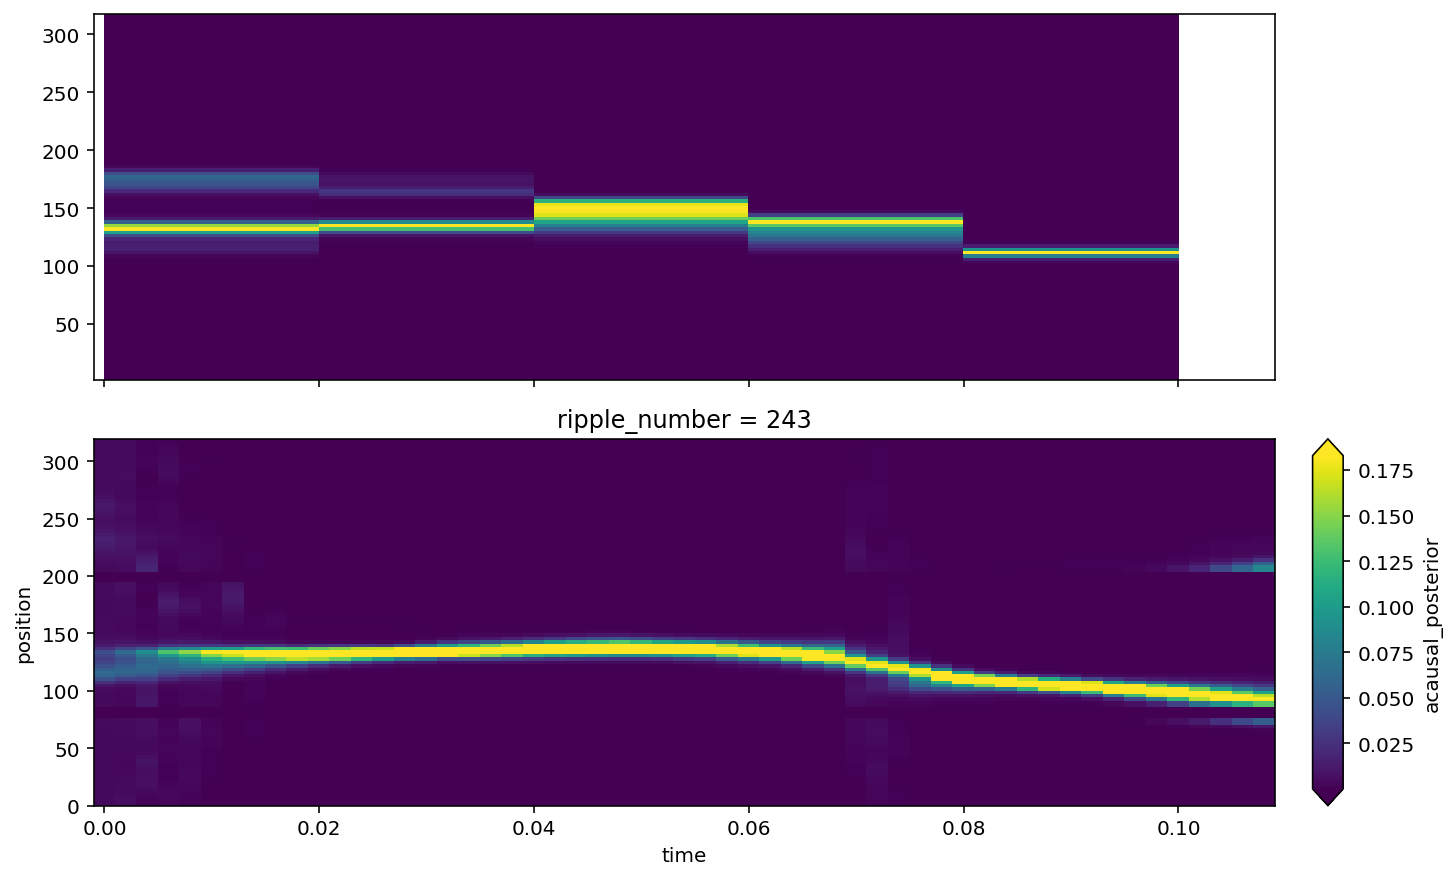

In [41]:
ripple_number = 243

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)

/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: divide by zero encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)
/Users/edeno/Documents/GitHub/replay_trajectory_paper/src/standard_decoder.py:267: RuntimeWarning: invalid value encountered in true_divide
  / np.sin(np.pi / 2 + projection_angle_radians)


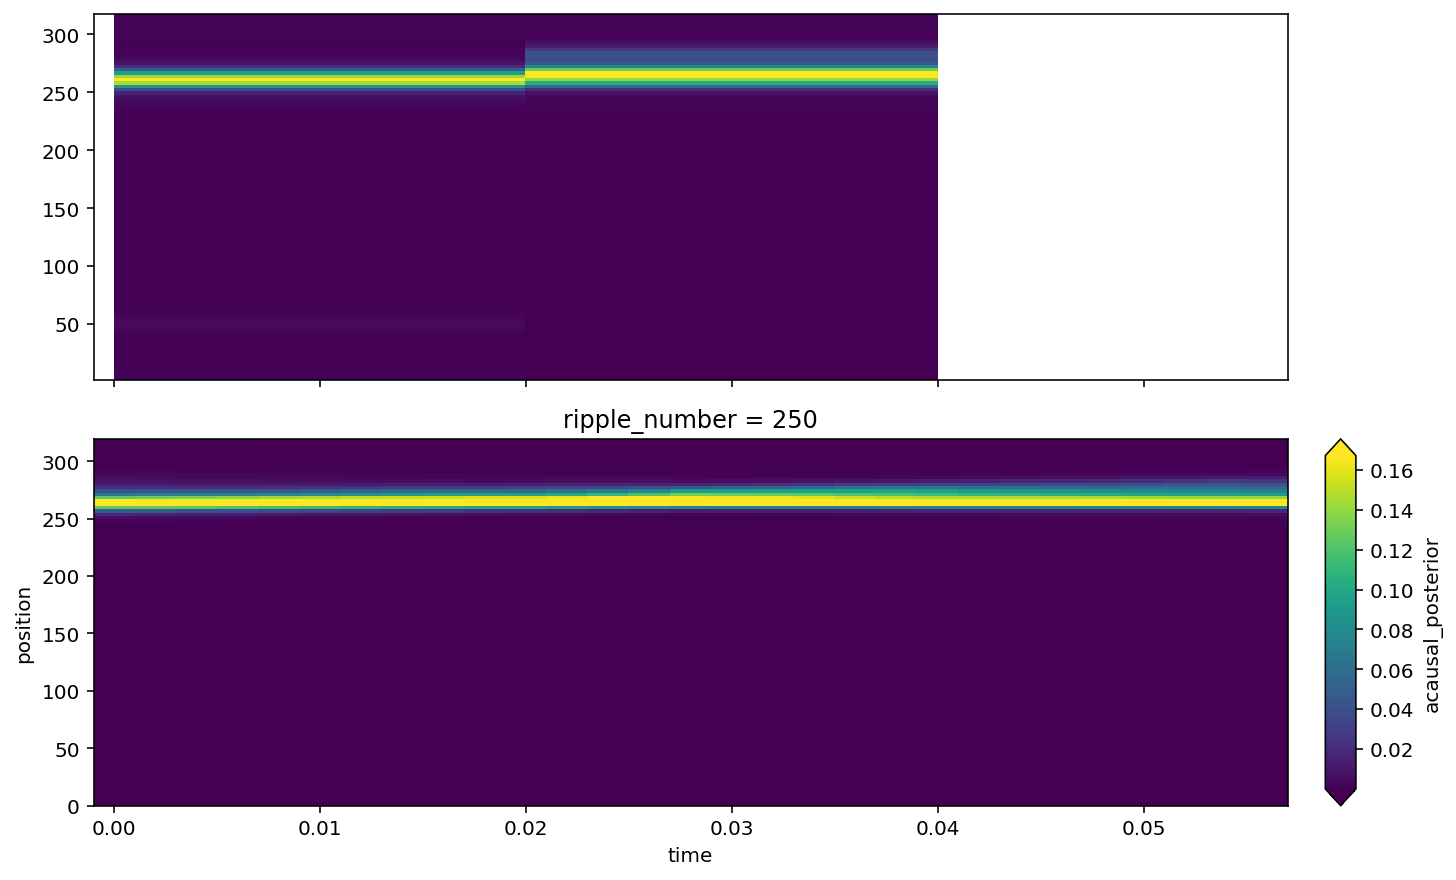

In [42]:
ripple_number = 250

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, time, place_bin_edges
)

x, y = np.meshgrid(time, place_bin_centers)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state").plot(x="time", y="position", robust=True, ax=axes[1])
axes[1].plot(time, estimated_position)